In [1]:
import data_analysis_funcs as daf
import matplotlib.pyplot as plt

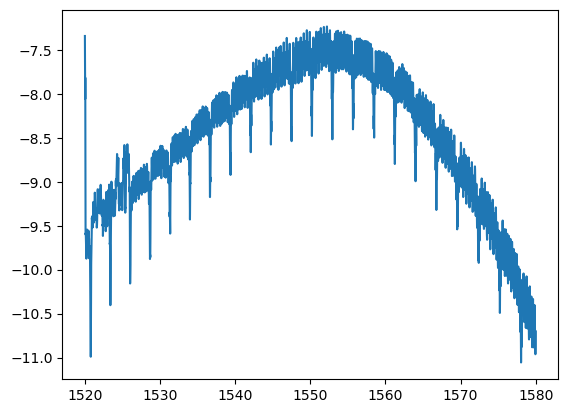

In [2]:
data_analyse_file="sg_rr_36_025 2023-12-13 16-41-08.csv"
wvlen_array,pow_array=daf.get_wavlen_and_pow_arrays(data_analyse_file)
daf.plot_visualise(wvlen_array,pow_array, full_range=True)

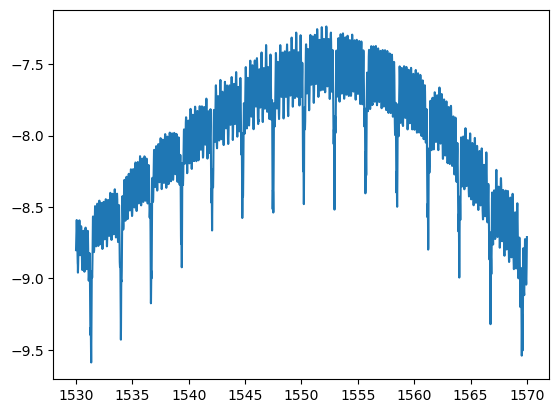

1530.0
1570.0


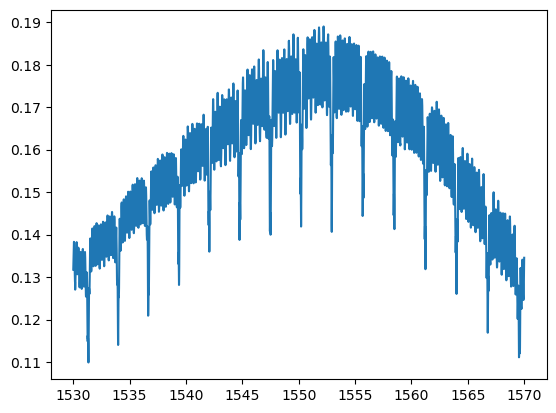

[0.13175349 0.13286217 0.13408175 ... 0.12974774 0.13226751 0.13455546]


In [3]:
start_point_index=1000
end_point_index=5001
daf.plot_visualise(wvlen_array,pow_array,full_range=False,start_index=start_point_index,stop_index=end_point_index)
wvlen_peak_search=wvlen_array[start_point_index:end_point_index] #selects wavelengths to search through
power_peak_search_dBm=pow_array[start_point_index:end_point_index] # selects powers to search though
power_peak_search=daf.vector_dBm_to_mW(power_peak_search_dBm) #converts powers to mW
print(wvlen_peak_search[0])
print(wvlen_peak_search[-1])
plt.plot(wvlen_peak_search,power_peak_search)
plt.show()
print(power_peak_search)

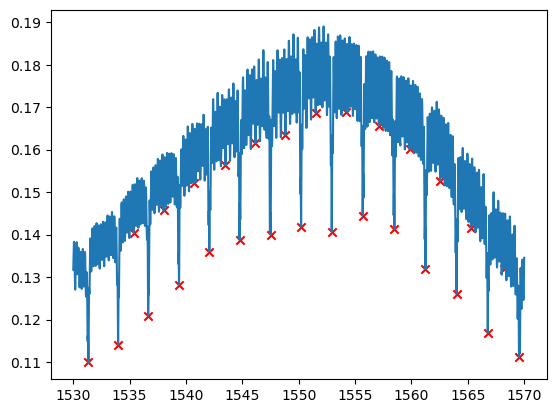

28
[1531.35, 1533.98, 1535.37, 1536.64, 1538.01, 1539.38, 1540.67, 1542.07, 1543.5, 1544.75, 1546.16, 1547.5, 1548.82, 1550.21, 1551.5, 1552.93, 1554.2, 1555.67, 1557.11, 1558.49, 1559.83, 1561.24, 1562.55, 1564.0, 1565.27, 1566.77, 1568.2, 1569.54]


In [4]:
wvlen_step_size=0.01
approx_fsr=2.5
promin_use=0.01
dist_use=(approx_fsr/2)/wvlen_step_size
#dist_use=1
peak_locs,n_peaks,peak_wavelens,peak_powers=daf.give_peak_locs(wvlen_step_size,approx_fsr,promin_use,dist_use,wvlen_peak_search,power_peak_search)
plt.plot(wvlen_peak_search,power_peak_search)
plt.scatter(peak_wavelens,peak_powers,color="red", marker="x")
plt.show()
print(n_peaks)#just added for check
print(peak_wavelens)#check

In [5]:
fsr_values=daf.calc_fsrs(peak_wavelens)
fsr_mean,fsr_error=daf.fsr_avg_and_error(fsr_values)
print(fsr_values)
print(fsr_mean)
print(fsr_error)

[2.63 1.39 1.27 1.37 1.37 1.29 1.4  1.43 1.25 1.41 1.34 1.32 1.39 1.29
 1.43 1.27 1.47 1.44 1.38 1.34 1.41 1.31 1.45 1.27 1.5  1.43 1.34]
1.4144444444444464
0.04854384845860809


Now to calculate peak widths below:

[0.1396308  0.18827188 0.10195085 0.12826594 0.10394799 0.12812665
 0.10508659 0.21369192 0.11180948 0.14530749 0.11642941 0.14685103
 0.11012321 0.14346622 0.1103522  0.21856903 0.1110682  0.15174827
 0.0988155  0.14285018 0.10402064 0.14504189 0.10493263 0.1598475
 0.11247452 0.14895645 0.09980254 0.14500284]


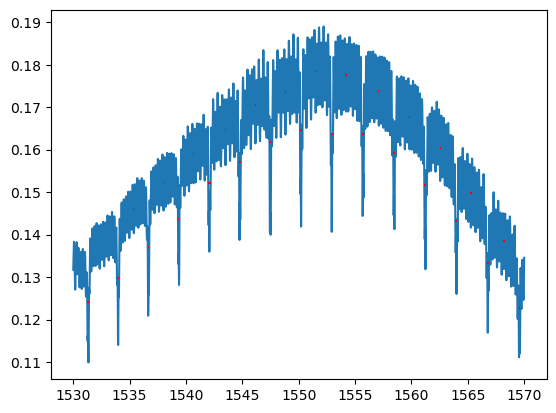

In [6]:
peak_width_data=daf.get_peak_FWHM(wvlen_step_size,approx_fsr,promin_use,dist_use,wvlen_peak_search,power_peak_search)
peak_widths=peak_width_data[0]
print(peak_widths)
peak_width_heights=peak_width_data[1]
peak_width_lefts=peak_width_data[2]
peak_width_rights=peak_width_data[3]
daf.plot_lines_FWHM(peak_width_heights,peak_width_lefts,peak_width_rights,wvlen_peak_search,power_peak_search)


Now calculating mean and standard error on FWHM using same func as for fsr:

In [7]:
mean_FWHM,FWHM_error=daf.fsr_avg_and_error(peak_widths)
print(mean_FWHM)
print(FWHM_error)

0.13344435261279972
0.006116845097761091


Now to to calculate Q factor, and its error, and Q^3/R^2, and its error.

In [8]:
Q_factor_list=peak_wavelens/peak_widths
mean_Q_factor,Q_factor_error=daf.fsr_avg_and_error(Q_factor_list)
print(mean_Q_factor)
print(Q_factor_error)


12194.635501850284
476.8919426856324


In [10]:
radius=36
radius_error=0.1
Qcubed_over_Rsquared,Qcubed_over_Rsquared_error=daf.calc_Q3overR2(mean_Q_factor,Q_factor_error,radius,radius_error)
print(Qcubed_over_Rsquared)
print(Qcubed_over_Rsquared_error)

1399269828.2413337
164346427.56564376
